In [97]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import scipy
from scipy.stats import t
from scipy import stats

def find_cpt_data(cpt_df, bh, depth, param):
    try:
        factor = 0.5
        df = cpt_df[(cpt_df["PointID"] == bh) & (cpt_df["Depth (m)"] >= depth - factor) & (cpt_df["Depth (m)"] <= depth + factor)]
        mean = df[param].mean()
    except Exception as e:
        print(bh, e)
        mean = "error"
    return mean

def find_ocr(bh, layer):
    ocr_filter = ocr_df[(ocr_df["PointID"] == bh) & (ocr_df["Index"] == layer)]
    try:
        return ocr_filter["OCR"].mean()
    except:
        return "Error"

In [93]:
df = pd.read_excel("data/shansep plot.xlsx")
su_df = pd.read_excel("data/all_su.xlsx", "triaxial")
cpt_df = pd.read_excel("data/CPT parameter update.xlsx")
ocr_df = pd.read_excel("data/Vineyard OCR.xlsx")

In [98]:
su_df["σv (kPa)"] = su_df.apply(lambda x: find_cpt_data(cpt_df, x.PointID, x.Depth, "σv (kPa)"), axis=1)
su_df["σ'v (kPa)"] = su_df.apply(lambda x: find_cpt_data(cpt_df, x.PointID, x.Depth, "σ'v (kPa)"), axis=1)
su_df["Su/σ'v"] = su_df.apply(lambda x: x.Su/ x["σ'v (kPa)"], axis=1)
su_df["Qt"] = su_df.apply(lambda x: find_cpt_data(cpt_df, x.PointID, x.Depth, "Qt (kPa)"), axis=1)
su_df["OCR new"] = su_df.apply(lambda x: x.Qt*0.091 + 1.718, axis=1)
su_df["OCR layer"] = su_df.apply(lambda x: find_ocr(x.PointID, x.Index), axis=1)
#df["OCR new layer"] = df.apply(lambda x: choose_ocr(x["OCR new"], x["OCR layer"]), axis=1)

In [114]:
su_df[(su_df["OCR new"] > 5) & (su_df["Test"] != "UU")]

,Unnamed: 0,raw PointID,Depth,Su,Test,PointID,Index,PI,PI Δ,PI Δ index,FC,FC Δ,FC Δ index,σv (kPa),σ'v (kPa),Su/σ'v,Qt,OCR new,OCR layer
55,548,544WTG23-BH04,15.7,75.0,CIU,544WTG23-BH04,4,12,1.0,0,77.4,1.0,0,710.384137,140.070555,0.535444,38.795551,5.248395,6.411215
56,549,544WTG23-BH04,15.7,151.0,CIU,544WTG23-BH04,4,12,1.0,0,77.4,1.0,0,710.384137,140.070555,1.078028,38.795551,5.248395,6.411215
57,550,544WTG23-BH04,15.7,200.0,CIU,544WTG23-BH04,4,12,1.0,0,77.4,1.0,0,710.384137,140.070555,1.427852,38.795551,5.248395,6.411215
59,552,544WTG23-BH04,30.7,227.0,CAUC,544WTG23-BH04,6,22,0.0,0,57.3,0.0,0,991.807467,277.822587,0.817068,53.688042,6.603612,NaN
60,556,544WTG23-BH05,3.6,40.0,CIU,544WTG23-BH05,2,8,0.6,0,74.7,0.6,0,487.113227,35.284256,1.133650,37.218027,5.104840,NaN
72,587,544WTG23-BH10a,23.7,110.0,CAUC,544WTG23-BH10,8,33,0.2,0,21.0,1.0,0,875.584086,226.868701,0.484862,93.162189,10.195759,NaN
75,593,544WTG23-BH11,8.5,68.0,CIU,544WTG23-BH11,3,18,0.0,0,83.0,0.0,0,574.549706,74.797735,0.909118,75.271412,8.567698,6.978912


(0.0, 1.3)

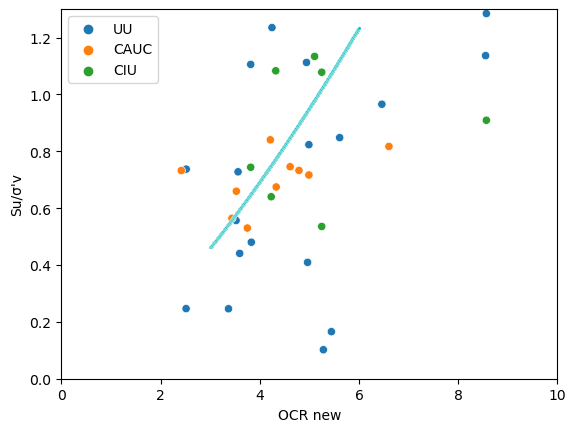

In [123]:
ax = sns.scatterplot(data=su_df, y="Su/σ'v", x="OCR new", hue="Test")
ax = sns.scatterplot(x=linex, y=liney, s=5, c="c")
ax.set_xlim(0, 10)
ax.set_ylim(0, 1.3)

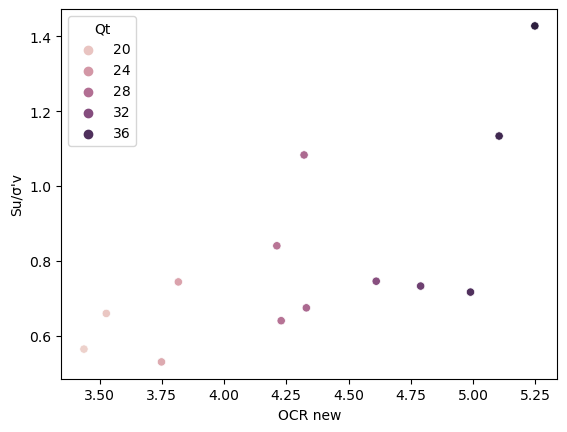

In [116]:
#filter_list = ["CIU", "CAU", "UU"]
plot_df = su_df[(su_df["Test"] == "CIU") | (su_df["Test"] == "CAUC")]
plot_df = plot_df[(plot_df["Qt"] < 40) & (plot_df["OCR new"] > 2.5)]
plot_df = plot_df[(plot_df["Su"] != 151) & (plot_df["Su"] != 75)]
ax = sns.scatterplot(data=plot_df, y="Su/σ'v", x="OCR new", hue="Qt")

[Text(3, 0, '3'), Text(4, 0, '4'), Text(5, 0, '5'), Text(6, 0, '6')]

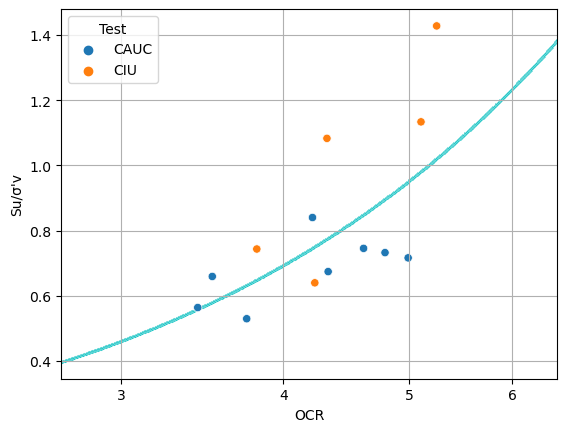

In [134]:
# y = S * x^m
linex = np.linspace(2.7, 6.5, num=1000)
liney = 0.097*linex**(1.42)
#plot_df = df[(df["Test"] != "UU") & (df["Su/σ'v"] < 0.48) & (df["OCR new"] < 4.8)]    # Remove point that is at the start of the cpt

#ax = sns.scatterplot(x=linex, y=liney, s=5, c="r")
#ax = sns.scatterplot(x=linex, y=liney2, s=5, c="c")
ax = sns.scatterplot(x=linex, y=liney, s=5, c="c")
ax = sns.scatterplot(data=plot_df, y="Su/σ'v", x="OCR new", hue="Test")
plt.grid(True, which="both")
plt.xscale("log")
ax.set_xlim(2.7, 6.5)
#plt.yscale("log")
ax.set_xlabel("OCR")
ax.set_xticks([3, 4, 5, 6])
ax.set_xticklabels([3, 4, 5, 6])

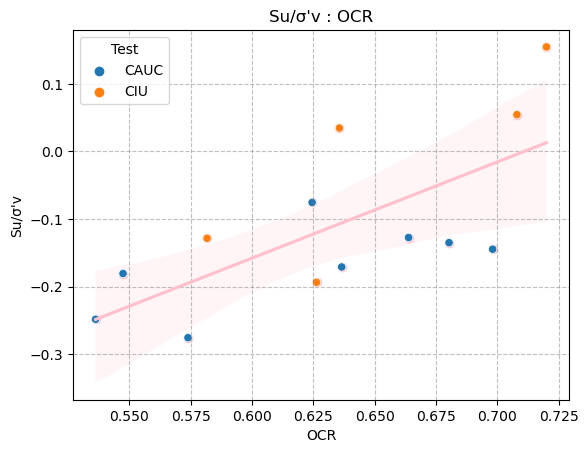

slope = 1.42
intercept = -1.01
r = 0.69
p = 0.01
sterr = 0.45


In [118]:
su_array = plot_df["Su/σ'v"]
ocr_array = plot_df["OCR new"]
ax = sns.regplot(x=np.log10(ocr_array), y=np.log10(su_array), color="pink")
ax = sns.scatterplot(y=np.log10(su_array), x=np.log10(ocr_array), hue=plot_df["Test"])
ax.set_title("Su/σ'v : OCR")
#ax.set_ylim(-1.7, 0.5)
ax.set_xlabel("OCR")
plt.grid(True, linestyle="--", color="gray", alpha=0.5)
plt.show(ax)
# get equation of line
slope, intercept, r, p, sterr = scipy.stats.linregress(y=np.log10(su_array), x=np.log10(ocr_array))
param_list = [slope, intercept, r, p, sterr]
param_str = ["slope", "intercept", "r", "p", "sterr"]
for i, param in zip(param_str, param_list):
    print(f"{i} = {round(param, 2)}")

In [136]:
p

0.008696824613375339

In [120]:
10**(intercept)

0.09723656374452411

In [5]:
# y = S * x^m
linex = np.linspace(-2, , num=100)
liney = -1.91 + linex*0.67

ax = sns.scatterplot(x=linex, y=liney)
ax = sns.scatterplot(data=df, y="Su/σ'v log", x="OCR log", hue="Test")

SyntaxError: invalid syntax (3566716419.py, line 2)

In [ ]:
ax = sns.scatterplot(x=linex, y=liney)
ax = sns.scatterplot(data=df, y="Su/σ'v", x="OCR", hue="PI")

In [ ]:
ax = sns.scatterplot(x=linex, y=liney)
ax = sns.scatterplot(data=df, y="Su/σ'v", x="OCR", hue="FC")

In [74]:
#df.to_excel("ocr_layer.xlsx")